
<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./PLLC.ipynb" download="PLLC.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=PLLC.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/bilke/ogs/-/blob/web-versioning/Tests/Data/Mechanics/PLLC/PLLC.py"><img src="https://img.shields.io/static/v1?label=Source:&message=PLLC.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/6.5.6-0.7.0?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/Mechanics/PLLC/PLLC.py%26branch=6.5.6%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>

### Power Law Linear Creep

This benchmark shows the increased creep rate of salt rock at lower deviatoric stress. A two component power law (which we call Power Law Linear Creep, or short PLLC) provides an easy way to capture the power law behaviour (dislocation creep) and the linear behaviour (pressure solution creep). For more details have a look at (Zill et al., 2022).


In [1]:
import contextlib
import os
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import ogstools as ot
import vtuIO

In [2]:
prj_name = "uniax_compression"
data_dir = os.environ.get(
    "OGS_DATA_DIR", str(str(Path.cwd())).split("/Data/")[0] + "/Data/"
)
input_file = f"{data_dir}/Mechanics/PLLC/{prj_name}.prj"

out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
out_dir.mkdir(parents=True, exist_ok=True)

os.chdir(out_dir)

prj_file = f"{out_dir}/{prj_name}_out.prj"
ogs_model = ot.Project(input_file=input_file, output_file=prj_file)

### Experimental data

A nice overview for the strain rates of salt for different temperatures and differential stresses can be found in (Li et al., 2021).

In [3]:
# Unfortunately the source for the WIPP data has gone missing - will be added if it's found again
ExData = {
    "WIPP CS 25": (
        25,
        "^",
        [
            [9.87970002, 2.013560846e-05],
            [11.84642707, 3.178356756e-05],
            [7.87388785, 1.66059726e-06],
        ],
    ),
    "WIPP CS 60": (
        60,
        "^",
        [
            [3.98589289, 5.7824853e-06],
            [5.94266985, 2.075776623e-05],
            [7.87388785, 1.953209818e-05],
            [9.96978837, 5.841438703e-05],
            [11.84642707, 0.00011762092257],
            [13.94911482, 0.00026749321794],
            [17.9857158, 0.00111804208073],
            [1.9814251, 8.7645834e-07],
            [3.91418422, 4.01350889e-06],
            [5.88897108, 3.34371363e-06],
            [7.87388785, 1.129440706e-05],
            [9.87970002, 2.99068674e-05],
            [11.84642707, 7.681792203e-05],
            [13.82306874, 0.00011067584933],
            [15.83934389, 0.00052247037957],
        ],
    ),
    "DeVries 1988 25": (
        25,
        "s",
        [
            [4.99, 2.10816e-06],
            [4.99, 2.4192e-06],
            [5, 1.8144e-06],
            [9.99, 2.2032e-05],
            [14.96, 9.2448e-05],
            [14.98, 0.000216],
        ],
    ),
    "DeVries 1988 100": (
        100,
        "s",
        [
            [4.95, 9.6768e-05],
            [6.77, 0.000292896],
            [7.46, 0.000324],
            [8.55, 0.000664416],
            [8.92, 0.00091584],
            [8.98, 0.0009936],
            [9.91, 0.00124416],
            [10.1, 0.00139968],
            [10.22, 0.00093312],
            [10.27, 0.00132192],
            [12.1, 0.00216],
            [12.3, 0.00409536],
            [12.35, 0.00320544],
            [12.37, 0.00292032],
            [12.39, 0.00253152],
            [12.4, 0.0026784],
            [12.46, 0.0025056],
            [12.49, 0.00347328],
            [13.57, 0.00273024],
            [13.78, 0.00242784],
            [14.7, 0.00482112],
            [16.87, 0.0095904],
            [17.2, 0.0123552],
            [19.96, 0.030672],
        ],
    ),
    "DeVries 1988 200": (
        200,
        "s",
        [
            [3.47, 0.00117504],
            [4.71, 0.0032832],
            [6.67, 0.0104544],
            [6.78, 0.0132192],
            [9.86, 0.214272],
        ],
    ),
    "Berest 2015 14.3": (
        14.3,
        "P",
        [
            [0.09909639, 8.944207e-08],
            [0.19575886, 1.4118213e-07],
            [0.29452325, 1.4118213e-07],
            [0.49411031, 9.799173e-08],
        ],
    ),
    "Berest 2017 7.8": (
        7.8,
        "P",
        [
            [0.19575886, 2.2285256e-07],
            [0.19575886, 9.505469e-08],
            [0.19754389, 2.5947583e-07],
            [0.19754389, 2.647936e-08],
            [0.39379426, 4.9162047e-07],
            [0.39738509, 6.801413e-08],
            [0.59247161, 4.0957628e-07],
            [0.59247161, 5.7241269e-07],
            [0.59787408, 1.0735864e-07],
            [1.0591736, 1.11804208e-06],
        ],
    ),
}

### Parameters

This set of parameters gives a good fit with the experimental data. The grain size is a bit larger than the usual grain size of roughly 1 cm.

In [4]:
A1 = 0.18  # d^-1
Q1 = 54e3  # kJ / mol
A2 = 6.5e-5  # m^3 K d^−1 # noqa: RUF003
Q2 = 24.5e3  # kJ / mol
dGrain = 5e-2  # m
sref = 1.0  # MPa


def BGRa(sig, T):
    return A1 * np.exp(-Q1 / (8.3145 * (273.15 + T))) * np.power(sig / sref, 5.0)


def PLLC(sig, T):
    return A1 * np.exp(-Q1 / (8.3145 * (273.15 + T))) * np.power(
        sig / sref, 5.0
    ) + A2 * np.exp(-Q2 / (8.3145 * (273.15 + T))) * sig / sref / np.power(
        dGrain, 3
    ) / (
        273.15 + T
    )

### Simulation and plot

The experimental data is compared against the model results (analytically and numerically)

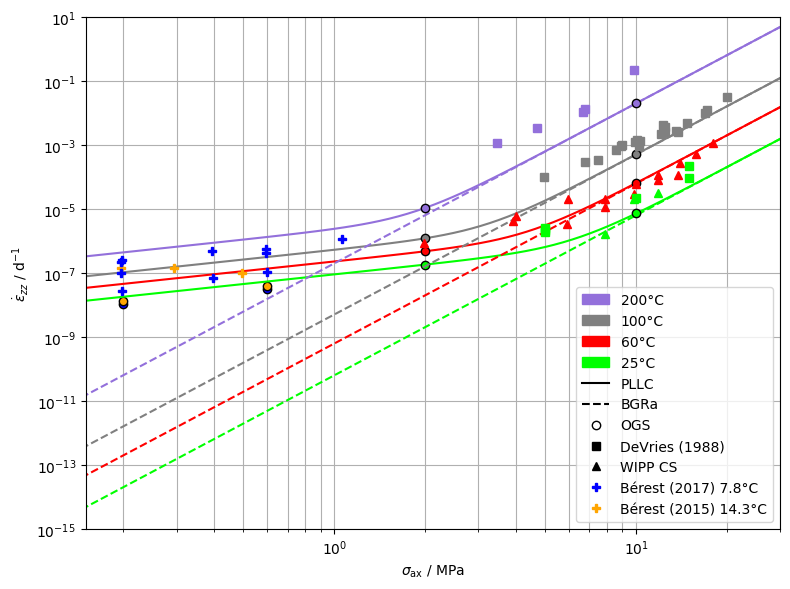

In [5]:
lo_stresses = np.array([0.2e6, 0.6e6])
hi_stresses = np.array([2e6, 10e6])
Exps = {
    7.8: ("blue", lo_stresses),
    14.3: ("orange", lo_stresses),
    25: ("lime", hi_stresses),
    60: ("red", hi_stresses),
    100: ("gray", hi_stresses),
    200: ("mediumpurple", hi_stresses),
}

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlabel("$\\sigma_\\mathrm{ax}$ / MPa")
ax.set_ylabel("$\\dot{\\epsilon}_{zz}$ / d$^{-1}$")
ax.set_xlim(0.15, 30)
ax.set_ylim(1e-15, 1e1)
ax.grid(visible=True, which="both")
points = {"pt0": (1.0, 1.0, 1.0)}

sigs = np.logspace(-1, 2, 100)
for temp, (col, stresses) in Exps.items():
    # plot analytical curves
    if temp >= 25:
        ax.plot(sigs, BGRa(sigs, temp), color=col, ls="--")
        ax.plot(sigs, PLLC(sigs, temp), color=col, ls="-")

    # simulation in ogs and plot results
    eps_dot = []
    ogs_model.replace_parameter_value("T_ref", str(temp + 273.15))
    for stress in stresses:
        ogs_model.replace_parameter_value("sigma_ax", str(-stress))
        ogs_model.write_input()
        # hide output
        with contextlib.redirect_stdout(None):
            ogs_model.run_model(
                logfile=f"{out_dir}/out.txt", args="-m " + f"{data_dir}/Mechanics/PLLC/"
            )
            pvdfile = vtuIO.PVDIO(f"{prj_name}.pvd", dim=3)
        eps_zz = pvdfile.read_time_series("epsilon", points)["pt0"][:, 2]
        eps_zz_dot = np.abs(np.diff(eps_zz)) / np.diff(pvdfile.timesteps)
        # omit the first timestep
        eps_dot += [np.mean(eps_zz_dot[1:])]
    ax.loglog(1e-6 * stresses, eps_dot, "o", c=col, markeredgecolor="k")

# plot experimental data points
for _Ex, (temp, m, Data) in ExData.items():
    stresses, eps_dot = np.array(Data).T
    ax.loglog(stresses, eps_dot, m, c=Exps[temp][0])

# create legend
patches = [
    mpl.patches.Patch(color=col, label=str(temp) + "°C")
    for temp, (col, _) in Exps.items()
    if temp >= 25
][::-1]


def addLeg(**args):
    return patches.append(mpl.lines.Line2D([], [], **args))


addLeg(c="k", label="PLLC")
addLeg(c="k", ls="--", label="BGRa")
addLeg(c="w", ls="None", marker="o", mec="k", label="OGS")
addLeg(c="k", ls="None", marker="s", label="DeVries (1988)")
addLeg(c="k", ls="None", marker="^", label="WIPP CS")
addLeg(c="b", ls="None", marker="P", label="Bérest (2017) 7.8°C")
addLeg(c="orange", ls="None", marker="P", label="Bérest (2015) 14.3°C")
ax.legend(handles=patches, loc="best")

fig.tight_layout()
plt.show()

### References

Zill, Florian, Wenqing Wang, and Thomas Nagel. Influence of THM Process Coupling and Constitutive Models on the Simulated Evolution of Deep Salt Formations during Glaciation. The Mechanical Behavior of Salt X. CRC Press, 2022. https://doi.org/10.1201/9781003295808-33.

Li, Shiyuan, and Janos Urai. Numerical Studies of the Deformation of Salt Bodies with Embedded Carbonate Stringers. Online, print. Publikationsserver der RWTH Aachen University, 2012. http://publications.rwth-aachen.de/record/211523/files/4415.pdf